# Home Exercise 1 on Machine Translation

Implement a **sequence2sequence** model to translate English to Vietnamese. In this exercise, we will sequentially practice the steps to build a machine learning system for the machine translation task using a **seq2seq model**. These steps include:
- Downloading and preprocessing bilingual data
- Creating training data
- Building a seq2seq model with **attention**
- Visualizing attention data
- Translating new sentences on real-world data.

- **Data**: [IWSLT’15 English-Vietnamese](https://www.manythings.org/anki/)  
  - **Train set**: `train.en` and `train.vi`  
  - **Validation set**: `tst2012.en` and `tst2012.vi`  
  - **Test set**: `tst2013.en` and `tst2013.vi`

**Note**: Submit only a **single Jupyter Notebook file** that can handle all tasks, including data downloading, preprocessing, model training, and model evaluation. *(Submissions that do not follow the guidelines will receive a score of 0.)*

# Grading Criteria

For valid submissions, scores will be assigned based on the **leaderboard ranking** (**strictly greater**):

- **Top 25%** → **10 points**
- **25% - 50%** → **9.0 points**
- **50% - 75%** → **8.0 points**
- **75% - 100%** → **7.0 points**


# Import

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
import string
import random
import gdown
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import ReduceLROnPlateau
from nltk.translate.bleu_score import corpus_bleu



# Download

I store all the data on gdrive then i use gdown to download it => this help me to be able to download the dataset from anywhere from kaggle, colab, to local

In [5]:
# https://drive.google.com/drive/folders/1XfoAmyE9u0GLRTl44f56hhdDtcMG87yT?usp=sharing
# URL of the shared folder
folder_url = "https://drive.google.com/drive/folders/1XfoAmyE9u0GLRTl44f56hhdDtcMG87yT?usp=sharing"

# Output directory where the folder will be saved
output_dir = "./NLP_Data_GDrive"

# Download the folder
gdown.download_folder(folder_url, output=output_dir, quiet=False, use_cookies=False)


Retrieving folder contents


Retrieving folder 1enOiXl7_FDBG6zjv37OHRLQKD-3I9q1J IWSLT'15 en-vi
Processing file 1z5x7Am2edrxeKZbaWbInX3osdIAp6gY7 dict.en-vi.txt
Processing file 1dPYH8iKvDX93mqTGL9ZZeQTmvu8vk3LY luong-manning-iwslt15.pdf
Processing file 1wK7IFfLvuT7FpNCyhBJt24oOYVNEnkW4 train.en.txt
Processing file 1AcH5f9kt6WAcWxK-8DWxzSEyJJkwWlPy train.vi.txt
Processing file 14ETqYRwtY1RFNn8kRaw6BwDbRu9tOWba tst2012.en.txt
Processing file 178dN2GGezPK-4eP0I2K-OtqtLFLBulXI tst2012.vi.txt
Processing file 1CnqIy8__bPdryPlPGObbZdMQBL0wkDE0 tst2013.en.txt
Processing file 1efWPPlg8YtU4FMCB1jBsPpmEHxe5-Eml tst2013.vi.txt
Processing file 1E5C9s6yU8AdSxeGF_gTSprheFLNiwoDu vocab.en.txt
Processing file 1MJ3ASLle3ORvawaT7M1ouqLxKTAcC5Vo vocab.vi.txt
Processing file 1ku4GWXvjWuEkI2c9GAzify5s-RlqZgop iwslt15-englishvietnamese.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1z5x7Am2edrxeKZbaWbInX3osdIAp6gY7
To: /kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/dict.en-vi.txt
100%|██████████| 487k/487k [00:00<00:00, 78.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dPYH8iKvDX93mqTGL9ZZeQTmvu8vk3LY
To: /kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/luong-manning-iwslt15.pdf
100%|██████████| 131k/131k [00:00<00:00, 79.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1wK7IFfLvuT7FpNCyhBJt24oOYVNEnkW4
To: /kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/train.en.txt
100%|██████████| 13.6M/13.6M [00:00<00:00, 33.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AcH5f9kt6WAcWxK-8DWxzSEyJJkwWlPy
To: /kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/train.vi.txt
100%|██████████| 18.1M/18.1M [00:00<00:00, 65.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=14ETqYRwtY1RFNn8kRaw

["./NLP_Data_GDrive/IWSLT'15 en-vi/dict.en-vi.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/luong-manning-iwslt15.pdf",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/train.en.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/train.vi.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/tst2012.en.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/tst2012.vi.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/tst2013.en.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/tst2013.vi.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/vocab.en.txt",
 "./NLP_Data_GDrive/IWSLT'15 en-vi/vocab.vi.txt",
 './NLP_Data_GDrive/iwslt15-englishvietnamese.zip']

In [6]:
# Define base directory (update this if needed)
# data_dir = "/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/"
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, "NLP_Data_GDrive", "IWSLT'15 en-vi")

# File paths
train_en_path = os.path.join(data_dir, "train.en.txt")
train_vi_path = os.path.join(data_dir, "train.vi.txt")
test_en_path_2012 = os.path.join(data_dir, "tst2012.en.txt")
test_vi_path_2012 = os.path.join(data_dir, "tst2012.vi.txt")
test_en_path_2013 = os.path.join(data_dir, "tst2013.en.txt")
test_vi_path_2013 = os.path.join(data_dir, "tst2013.vi.txt")

# Check if files exist
file_paths = [train_en_path, train_vi_path, test_en_path_2012, test_vi_path_2012, test_en_path_2013, test_vi_path_2013]
for file in file_paths:
    print(f"{file}: {'✅ Found' if os.path.exists(file) else '❌ Not Found'}")


/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/train.en.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/train.vi.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2012.en.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2012.vi.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2013.en.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2013.vi.txt: ✅ Found


# Dataset class

In [ ]:
class MTDataset(Dataset):
    """
    Dataset for machine translation tasks.

    Args:
        input_matrix (List[List[float]]): Input sentence vectors.
        target_matrix (List[List[float]]): Corresponding target sentence vectors.
    """
    def __init__(self, input_matrix, target_matrix):
        self.data = []
        for i in range(len(input_matrix)):
            self.data.append((input_matrix[i], target_matrix[i]))
            
    def __getitem__(self, idx):
        return (torch.Tensor(self.data[idx][0]), torch.Tensor(self.data[idx][1]))
    
    def __len__(self):
        return len(self.data)
    

# Encoder - Decoder with Attention

In [ ]:
# -*- coding: utf-8 -*-
import torch.nn.functional as F

class Encoder(nn.Module):
    """
    Encoder using bi-directional GRU to encode input sentences.

    Args:
        vocab_size (int): Size of the vocabulary.
        embedding_dim (int): Dimension of word embeddings.
        hidden_size (int): Size of GRU hidden state.
        modified (bool): 
            - If False (default), use the last backward hidden state (standard approach).
            - If True, use a learned combination of the last forward and backward hidden states.
    """

    def __init__(self, vocab_size, embedding_dim, hidden_size, modified=False):
        super(Encoder, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.hidden_size = hidden_size
        self.modified = modified
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = nn.GRU(self.embedding_dim, self.hidden_size, batch_first=True, bidirectional=True)
        if self.modified:
            self.fc_hidden = nn.Linear(hidden_size * 2, hidden_size)
        # self.dropout = nn.Dropout(0.5) # this has bad performance
        
    def forward(self, x):
        """
        Forward pass of the Encoder.

        Args:
            x (Tensor): Input tensor of token indices with shape (batch_size, sequence_length).

        Returns:
            out (Tensor): Output features from the bidirectional GRU for all time steps (batch_size, sequence_length, hidden_size * 2).
            enc_hidden (Tensor): 
                - If modified=False: Last backward hidden state from GRU (1, batch_size, hidden_size).
                - If modified=True: Learned combination of forward and backward hidden states (1, batch_size, hidden_size).
        """
        embedding = self.embedding(x)
        out, hidden = self.gru(embedding)
        
        # backward hidden state is the first time step (after reverse)
        last_backward_hidden = out[:, 0, self.hidden_size:].unsqueeze(0)
        
        # forward hidden state is the last layer's final hidden state
        last_forward_hidden = hidden[0].unsqueeze(0)
        if self.modified:
            enc_hidden = self.fc_hidden(torch.cat((last_backward_hidden, last_forward_hidden), dim=-1))
        else:
            enc_hidden = last_backward_hidden
        return out, enc_hidden
    
class Decoder(nn.Module):
    """
    Decoder with Attention for one timestep of a sequence-to-sequence model.

    Args:
        hidden_size (int): Size of GRU hidden state.
        vocab_size (int): Size of the output vocabulary.
        embedding_dim (int): Dimension of word embeddings.

    Components:
        - Attention mechanism using a feedforward alignment model.
        - GRU for decoding.
        - Linear layer to project decoder output to vocabulary logits.
    """
    def __init__(self, hidden_size, vocab_size, embedding_dim):
        super(Decoder, self).__init__()
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        
        # Attention layers (alignment model)
        self.Wa = nn.Linear(self.hidden_size, self.hidden_size)
        self.Ua = nn.Linear(self.hidden_size * 2, self.hidden_size)
        self.Va = nn.Linear(self.hidden_size, 1)
        self.softmax = nn.Softmax(dim=1)
        
        # Embedding + GRU + Output layers
        self.embedding = nn.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = nn.GRU(self.embedding_dim + self.hidden_size * 2, self.hidden_size, batch_first=True)
        self.out = nn.Linear(self.hidden_size, self.vocab_size)
        # self.dropout = nn.Dropout(0.5) # this has bad performance
    
    def forward(self, dec_input, hidden, enc_out):
        """
        Forward pass for one decoding timestep with attention.

        Args:
            dec_input (Tensor): Current input token index (batch_size).
            hidden (Tensor): Previous hidden state from decoder GRU (1, batch_size, hidden_size).
            enc_out (Tensor): Encoder output for all time steps (batch_size, Tx, hidden_size * 2).

        Returns:
            out (Tensor): Vocabulary distribution/logits for current timestep (batch_size, 1, vocab_size).
            hidden (Tensor): Updated decoder hidden state (1, batch_size, hidden_size).
            alphas (Tensor): Attention weights over encoder time steps (batch_size, Tx, 1).
        """
        Tx = enc_out.shape[1]
        
        # Repeat decoder hidden state across all encoder time steps
        hidden_repeat = hidden.permute(1, 0, 2).repeat(1, Tx, 1)
        energies = self.Va(torch.tanh(self.Wa(hidden_repeat) + self.Ua(enc_out)))
        
        # Compute attention weights (alphas)
        alphas = self.softmax(energies)
        context = torch.sum(alphas * enc_out, dim=1).unsqueeze(1)
        
        embedding = self.embedding(dec_input.unsqueeze(1))
        gru_input = torch.cat((embedding, context), dim=-1)
        out, hidden = self.gru(gru_input, hidden.contiguous())
        out = self.out(out)
        # return out, hidden # previous code 
        return out, hidden, alphas
        
    

# Language Class

In [ ]:
# -*- coding: utf-8 -*-
exclude = list(string.punctuation) + list(string.digits)

class Language(object):
    """
    A class to process and manage language data for sequence-to-sequence models.
    
    Args:
        sentence_list (List[str]): List of input sentences in string format.
        train (bool): Whether this instance is used for training. 
                      If False, `word2id` and `id2word` must be provided.
        word2id (dict, optional): Dictionary mapping words to unique integer IDs.
        id2word (list, optional): List mapping IDs back to corresponding words.
    
    """
    def __init__(self, sentence_list, train=True, word2id=None, id2word=None):
        self.word2id = word2id
        self.id2word = id2word
        self.train = train
        self.preprocess(sentence_list)
        self.get_vocab()
        self.get_word_vectors()
        
    def preprocess(self, sentence_list):
        """
        Add <START> and <END> tokens to each sentence and record the maximum sentence length.

        Args:
            sentence_list (List[str]): Raw input sentences.
        """
        self.max_len = 0
        self.sentences = []
        for sen in sentence_list:
            sen = '<START> ' + sen + ' <END>'
            length = len(sen.split())
            self.sentences.append(sen)
            if self.max_len < length:
                self.max_len = length
        self.padding()
    
    def padding(self):
        """
        Pad each sentence with <PAD> tokens so all sentences have equal length.
        """
        for i, sen in enumerate(self.sentences):
            length = len(sen.split())
            diff = self.max_len - length
            paddings = [' <PAD>'] * diff
            self.sentences[i] = sen + ''.join(paddings)
            
    def get_vocab(self):
        """
        Build vocabulary (word2id and id2word) if in training mode.
        Also computes vocab_size based on the vocabulary.
        """
        if self.train:
            self.word2id = {}
            self.id2word = []
            for s in self.sentences:
                for char in s.split():
                    if char not in self.word2id:
                        self.id2word.append(char)
                        self.word2id[char] = len(self.id2word) - 1
        self.vocab_size = len(self.id2word)
        
    def get_word_vectors(self):
        """
        Convert preprocessed sentences into sequences of word IDs.
        """
        self.wordvec = []
        for i, sen in enumerate(self.sentences):
            id_list = []
            for s in sen.split():
                if s in self.word2id:
                    id_list.append(self.word2id[s])
                else:
                    id_list.append(random.randint(0, self.vocab_size-1))
            self.wordvec.append(id_list)
        self.wordvec = np.array(self.wordvec)
        

In [ ]:
def generate_seed(seed):
    """
    Set the random seed for Python, NumPy, and PyTorch to ensure reproducibility.

    Args:
        seed (int): The seed value to use for all random generators.

    """
    torch.cuda.manual_seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True

def preprocess(inp_filename, target_filename, max_len):
    """
    Preprocess input and target text files by removing punctuation and digits, 
    converting to lowercase, and filtering by maximum sentence length.

    Args:
        inp_filename (str): Path to the input sentence file.
        target_filename (str): Path to the target sentence file.
        max_len (int): Maximum number of words allowed in a sentence. 
                       Sentences longer than this will be excluded.

    Returns:
        Tuple[List[str], List[str]]: A tuple containing two lists:
            - sentences_inp: Cleaned and filtered input sentences.
            - sentences_trg: Cleaned and filtered target sentences.
    """
    with open(inp_filename, 'r', encoding='utf8') as f_inp:
        lines_inp = f_inp.read().split('\n')
    with open(target_filename, 'r', encoding='utf8') as f_trg:
        lines_trg = f_trg.read().split('\n')
    
    sentences_inp, sentences_trg = [], []
    exclude = list(string.punctuation) + list(string.digits)
    
    for sen_inp, sen_trg in zip(lines_inp, lines_trg):
        sen_inp = ''.join([char for char in sen_inp if char not in exclude]).strip().lower()
        sen_trg = ''.join([char for char in sen_trg if char not in exclude]).strip().lower()
        len_inp = len(sen_inp.split())
        len_trg = len(sen_trg.split())
        if len_inp <= max_len and len_trg <= max_len:
            sentences_inp.append(sen_inp)
            sentences_trg.append(sen_trg)
    f_inp.close()
    f_trg.close()
    return sentences_inp, sentences_trg


## Translate

In [ ]:
def translate(sentence, inp_word2id, trg_word2id, trg_id2word, encoder, decoder, trg_max_len, device='cpu'):
    """
    Translate a source language sentence into a target language using a Seq2Seq model with attention.

    Args:
        sentence (str): The input sentence to translate (in plain text).
        inp_word2id (dict): Dictionary mapping source words to their corresponding IDs.
        trg_word2id (dict): Dictionary mapping target words to their corresponding IDs.
        trg_id2word (list): List mapping target IDs back to words.
        encoder (nn.Module): Trained Encoder model.
        decoder (nn.Module): Trained Decoder model with attention.
        trg_max_len (int): Maximum length of the generated target sentence.
        device (str): Device to run inference on, either 'cpu' or 'cuda'.

    Returns:
        Tuple[List[str], List[str], np.ndarray]:
            - translated_words: List of words predicted by the decoder (including `<START>` and `<END>`).
            - input_words: Tokenized version of the original input sentence after preprocessing.
            - attention_weights: Numpy array of shape (target_len, source_len) representing attention alignment per decoding step.
    """
    exclude = list(string.punctuation) + list(string.digits)
    sentence = '<START> ' + ''.join([char for char in sentence if char not in exclude]).strip().lower() + ' <END>'
    input_words = sentence.split()
    
    sen_matrix = [inp_word2id[s] for s in sentence.split()]
    sen_tensor = torch.Tensor(sen_matrix).to(device=device, dtype=torch.long).unsqueeze(0)
    encoder.eval()
    decoder.eval()
    with torch.no_grad():
        enc_out, enc_hidden = encoder(sen_tensor)
        dec_hidden = enc_hidden
        dec_input = torch.Tensor([trg_word2id['<START>']]).to(device='cuda', dtype=torch.long)
        
        # translated_words = []
        translated_words = ['<START>'] # add
        attention_weights = []
        for t in range(1, trg_max_len):
            out, dec_hidden, attn = decoder(dec_input, dec_hidden, enc_out)

            print(f"\n🔍 Step {t + 1} — Decoder Input: {dec_input.item()}")
            print("Attention shape:", attn.shape)  # Expect (batch, src_len, 1)
            print("Raw attention:", attn.squeeze().cpu().numpy())  # For inspection
            
            dec_input = torch.max(out, dim=-1)[1].squeeze(1)
            next_id = dec_input.squeeze().clone().cpu().numpy()
            next_word = trg_id2word[next_id]

            translated_words.append(next_word)
            attention_weights.append(attn.squeeze(0).squeeze(1).cpu().numpy())
            
            if next_word == '<END>':
                break
            
        
        else:
            # Add <END> if max length reached
            # translated_words.append('<END>')
            pass

        # Final log
        print("\nTranslated Words:", translated_words)
        print("Input Words:", input_words)
        print("Attention Matrix Shape:", np.stack(attention_weights).shape)
        
        # return translated_words, input_words, np.stack(attention_weights)[:len(translated_words) - 1]
        return translated_words, input_words, np.stack(attention_weights)



## Plot attention

In [ ]:
def plot_attention(attention, input_words, output_words):
    """
    Plot an attention heatmap between input and output words in a Seq2Seq model with attention.

    Args:
        attention (np.ndarray or Tensor): Attention weight matrix of shape (output_len, input_len),
                                          where each element represents the attention weight from an input word
                                          to an output word.
        input_words (List[str]): List of input tokens (e.g., in English).
        output_words (List[str]): List of output tokens (e.g., in Vietnamese).

    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention,
                xticklabels=input_words,
                yticklabels=output_words,
                cmap='viridis',
                annot=False)

    plt.xlabel("Input (English)")
    plt.ylabel("Output (Vietnamese)")
    plt.title("Attention Heatmap")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### Preparing data
* Preprocess input and target sentences for train, val and test set: remove all digits and punctuation, take only input - target pairs of sentences with length shorter than *MAX_LEN*. Here I choose max length = 20 for faster training.

In [13]:
# Define base directory (update this if needed)
# data_dir = "/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/"
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, "NLP_Data_GDrive", "IWSLT'15 en-vi")

# File paths
train_en_path = os.path.join(data_dir, "train.en.txt")
train_vi_path = os.path.join(data_dir, "train.vi.txt")
test_en_path_2012 = os.path.join(data_dir, "tst2012.en.txt")
test_vi_path_2012 = os.path.join(data_dir, "tst2012.vi.txt")
test_en_path_2013 = os.path.join(data_dir, "tst2013.en.txt")
test_vi_path_2013 = os.path.join(data_dir, "tst2013.vi.txt")

# Check if files exist
file_paths = [train_en_path, train_vi_path, test_en_path_2012, test_vi_path_2012, test_en_path_2013, test_vi_path_2013]
for file in file_paths:
    print(f"{file}: {'✅ Found' if os.path.exists(file) else '❌ Not Found'}")


/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/train.en.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/train.vi.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2012.en.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2012.vi.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2013.en.txt: ✅ Found
/kaggle/working/NLP_Data_GDrive/IWSLT'15 en-vi/tst2013.vi.txt: ✅ Found


In [14]:
MAX_LEN = 20
sentences_inp_train, sentences_trg_train = preprocess(train_en_path, train_vi_path, max_len=MAX_LEN)
sentences_inp_val, sentences_trg_val = preprocess(test_en_path_2012, test_vi_path_2012, max_len=MAX_LEN)
sentences_inp_test, sentences_trg_test = preprocess(test_en_path_2013, test_vi_path_2013, max_len=MAX_LEN)

* Create Language class for each set, each class will contain information like **max length, all sentences, word_to_indices and indices_to_word, vocab size and word vectors**. For validation set and test set, the **word_to_indices** and **indices_to_word** are retrieved from training set.

In [15]:
train_inp = Language(sentences_inp_train)
train_trg = Language(sentences_trg_train)

val_inp = Language(sentences_inp_val, train=False, word2id=train_inp.word2id, id2word=train_inp.id2word)
val_trg = Language(sentences_trg_val, train=False, word2id=train_trg.word2id, id2word=train_trg.id2word)

test_inp = Language(sentences_inp_test, train=False, word2id=train_inp.word2id, id2word=train_inp.id2word)
test_trg = Language(sentences_trg_test, train=False, word2id=train_trg.word2id, id2word=train_trg.id2word)

* Create Dataset classes

In [16]:
train_set = MTDataset(train_inp.wordvec, train_trg.wordvec)
val_set = MTDataset(val_inp.wordvec, val_trg.wordvec)
test_set = MTDataset(test_inp.wordvec, test_trg.wordvec)

* Create DataLoaders

In [17]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64)
test_loader = DataLoader(test_set, batch_size=64)

* Model's parameters

In [18]:
Tx, Ty = train_inp.max_len, train_trg.max_len
vocab_size_inp, vocab_size_trg = train_inp.vocab_size, train_trg.vocab_size
embedding_dim = 256
hidden_size = 1024


### Building models

In [19]:
if torch.cuda.is_available():
    device='cuda'
else:
    device='cpu'

# Train Models

In [ ]:
def validate(loader, encoder, decoder, id2word, criterion=None, device='cpu'):
    """
    Evaluate the Seq2Seq model's performance on a validation (or training) set using BLEU-4 score
    and optionally compute average loss.

    Args:
        loader (DataLoader): DataLoader providing batches of input-output pairs.
        encoder (nn.Module): Trained encoder model.
        decoder (nn.Module): Trained decoder model with attention.
        id2word (List[str]): List mapping target token IDs to words.
        criterion (nn.Module, optional): Loss function (e.g., nn.CrossEntropyLoss). If provided, loss is computed.
        device (str): Device for computation — either 'cpu' or 'cuda'.

    Returns:
        Tuple[float, Optional[float]]:
            - bleu (float): Corpus-level BLEU-4 score of predicted sequences against references.
            - val_loss (float or None): Average loss per token over the dataset, if `criterion` is provided.

    """
    encoder.eval()
    decoder.eval()
    references, hypotheses = [], []
    total_loss = 0
    compute_loss = criterion is not None
    count = 0

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=torch.long)
            y = y.to(device=device, dtype=torch.long)

            enc_out, enc_hidden = encoder(x)
            dec_hidden = enc_hidden
            dec_input = y[:, 0]  # <START> token
            ref_matrix = y.clone().cpu().numpy()

            # Save references
            for vec in ref_matrix:
                sentence = [id2word[id] for id in vec[1:] if id2word[id] not in ['<END>', '<PAD>']]
                references.append([sentence])

            hypo_matrix = []
            for t in range(1, y.size(1)):
                out, dec_hidden, att = decoder(dec_input, dec_hidden, enc_out)
                top = out.argmax(dim=-1).squeeze(1)
                dec_input = top
                next_id = list(top.clone().cpu().numpy())
                hypo_matrix.append(next_id)

                if compute_loss:
                    total_loss += criterion(out.squeeze(1), y[:, t]).item()

            hypo_matrix = np.array(hypo_matrix).transpose()  # (batch, time)
            for vec in hypo_matrix:
                sentence = [id2word[id] for id in vec if id2word[id] not in ['<END>', '<PAD>']]
                hypotheses.append(sentence)

            if compute_loss:
                count += y.size(0)  # batch size

    bleu = corpus_bleu(list_of_references=references, hypotheses=hypotheses)
    val_loss = total_loss / count if compute_loss else None

    encoder.train()
    decoder.train()

    return bleu, val_loss


In [ ]:
def train(encoder, decoder, train_loader, val_loader, optimizer, criterion, id2word,
          lr_scheduler=None, num_epochs=1, print_every=100, device='cpu', early_stop=False):
    """
    Train an encoder-decoder model with attention (no Seq2Seq wrapper).
    
    This function handles model training, BLEU score evaluation, and loss tracking for both 
    training and validation sets. It supports optional learning rate scheduling and early stopping.

    Args:
        encoder (nn.Module): The encoder model.
        decoder (nn.Module): The decoder model with attention.
        train_loader (DataLoader): DataLoader for the training set.
        val_loader (DataLoader): DataLoader for the validation set.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        criterion (nn.Module): Loss function (e.g., nn.CrossEntropyLoss).
        id2word (List[str]): Mapping from target vocabulary indices to words.
        lr_scheduler (torch.optim.lr_scheduler, optional): Learning rate scheduler.
        num_epochs (int): Number of training epochs to run.
        print_every (int): Frequency of printing batch-level training loss.
        device (str): Computation device — either 'cpu' or 'cuda'.
        early_stop (bool): If True, stop training early when validation BLEU decreases.

    Returns:
        Tuple[Dict[str, Dict[str, Any]], Dict[str, List[float]]]:
            - best_statedict: Dict containing best encoder and decoder weights.
            - history: Dictionary recording:
                * 'train_loss': List of training loss per epoch.
                * 'val_loss': List of validation loss per epoch.
                * 'train_bleu': List of training BLEU-4 scores per epoch.
                * 'val_bleu': List of validation BLEU-4 scores per epoch.

    """
    encoder.to(device)
    decoder.to(device)
    encoder.train()
    decoder.train()
    
    best_bleu = 0
    best_statedict = {'encoder': encoder.state_dict(), 'decoder': decoder.state_dict()}

    history = {
        'train_loss': [],
        'val_loss': [],
        'train_bleu': [],
        'val_bleu': []
    }

    for epoch in range(num_epochs):
        print(f'Epoch {epoch + 1}/{num_epochs}')
        epoch_loss = 0

        for i, (x, y) in enumerate(train_loader):
            x = x.to(device, dtype=torch.long)
            y = y.to(device, dtype=torch.long)

            enc_out, enc_hidden = encoder(x)
            dec_hidden = enc_hidden
            dec_input = y[:, 0]
            loss = 0
            optimizer.zero_grad()

            for t in range(1, y.size(1)):
                out, dec_hidden, att = decoder(dec_input, dec_hidden, enc_out)
                dec_input = y[:, t]
                loss += criterion(out.squeeze(1), y[:, t])

            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

            if i % print_every == 0:
                avg_batch_loss = loss.item() / y.size(1)
                print(f'Iter {i}, Loss = {avg_batch_loss:.6f}')

        if lr_scheduler is not None:
            lr_scheduler.step()

        avg_train_loss = epoch_loss / len(train_loader)

        # Evaluate BLEU and loss on training set
        train_bleu, _ = validate(train_loader, encoder, decoder, id2word, criterion, device)
        val_bleu, val_loss = validate(val_loader, encoder, decoder, id2word, criterion, device)

        # Save metrics
        history['train_loss'].append(avg_train_loss)
        history['train_bleu'].append(train_bleu)
        history['val_loss'].append(val_loss)
        history['val_bleu'].append(val_bleu)

        print(f"Epoch {epoch + 1} Summary:")
        print(f"Train Loss = {avg_train_loss:.4f}, BLEU = {train_bleu:.4f}")
        print(f"Val   Loss = {val_loss:.4f}, BLEU = {val_bleu:.4f}\n")

        if val_bleu > best_bleu:
            best_bleu = val_bleu
            best_statedict = {'encoder': encoder.state_dict(), 'decoder': decoder.state_dict()}
        elif early_stop:
            print("=== Early stopping: BLEU decreased ===")
            return best_statedict, history

    return best_statedict, history


## First model

In [22]:
# choose a seed for both models for consistent results
SEED = 5
generate_seed(SEED)  # generate seed to ensure consistent result each run
encoder_1 = Encoder(vocab_size_inp, embedding_dim, hidden_size).to(device=device)
decoder_1 = Decoder(hidden_size, vocab_size_trg, embedding_dim).to(device=device)


In [23]:
def init_weights(m):
    for name, param in m.named_parameters():
        if "weight" in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)


In [24]:
# encoder_1.apply(init_weights)

In [25]:
# decoder_1.apply(init_weights)

In [26]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [27]:
print(f"The model has {count_parameters(encoder_1):,} trainable parameters")
print(f"The model has {count_parameters(decoder_1):,} trainable parameters")

The model has 14,811,648 trainable parameters
The model has 28,803,082 trainable parameters


In [ ]:
# optimizer_1 = torch.optim.Adam(
#     params=list(encoder_1.parameters()) + list(decoder_1.parameters()),
#     lr=1e-4,  # or 5e-5
#     weight_decay=1e-5  # optional: helps regularize
# )

# scheduler_1 = torch.optim.lr_scheduler.ReduceLROnPlateau(
#     optimizer_1, mode='min', factor=0.5, patience=2, verbose=True
# )

optimizer_1 = torch.optim.Adam(params=list(encoder_1.parameters()) + list(decoder_1.parameters()))
scheduler_1 = StepLR(optimizer_1, step_size=3, gamma=0.2)
criterion_1 = nn.CrossEntropyLoss()

In [29]:
best_state1, history1 = train(
    encoder_1, decoder_1,
    train_loader,
    val_loader,
    optimizer_1,
    criterion_1,
    train_trg.id2word,
    lr_scheduler=scheduler_1,
    num_epochs=5, # 5
    print_every=100,
    device=device,
    early_stop=False
)

torch.save(best_state1, 'statedict_model1.pth')


Epoch 1/5
Iter 0, Loss = 9.022724
Iter 100, Loss = 2.981206
Iter 200, Loss = 2.507522
Iter 300, Loss = 2.557467
Iter 400, Loss = 2.465891
Iter 500, Loss = 2.250336
Iter 600, Loss = 2.182706
Iter 700, Loss = 2.084598
Iter 800, Loss = 2.108264
Iter 900, Loss = 2.083623
Iter 1000, Loss = 1.886406
Iter 1100, Loss = 1.926062
Epoch 1 Summary:
Train Loss = 50.5013, BLEU = 0.1495
Val   Loss = 1.6392, BLEU = 0.1174

Epoch 2/5
Iter 0, Loss = 1.609036
Iter 100, Loss = 1.541693
Iter 200, Loss = 1.321237
Iter 300, Loss = 1.677009
Iter 400, Loss = 1.512818
Iter 500, Loss = 1.579875
Iter 600, Loss = 1.700679
Iter 700, Loss = 1.682338
Iter 800, Loss = 1.590571
Iter 900, Loss = 1.391482
Iter 1000, Loss = 1.383972
Iter 1100, Loss = 1.447955
Epoch 2 Summary:
Train Loss = 34.3357, BLEU = 0.2361
Val   Loss = 1.7033, BLEU = 0.1382

Epoch 3/5
Iter 0, Loss = 0.997369
Iter 100, Loss = 1.035514
Iter 200, Loss = 1.134281
Iter 300, Loss = 1.025820
Iter 400, Loss = 1.118807
Iter 500, Loss = 1.202599
Iter 600, Loss

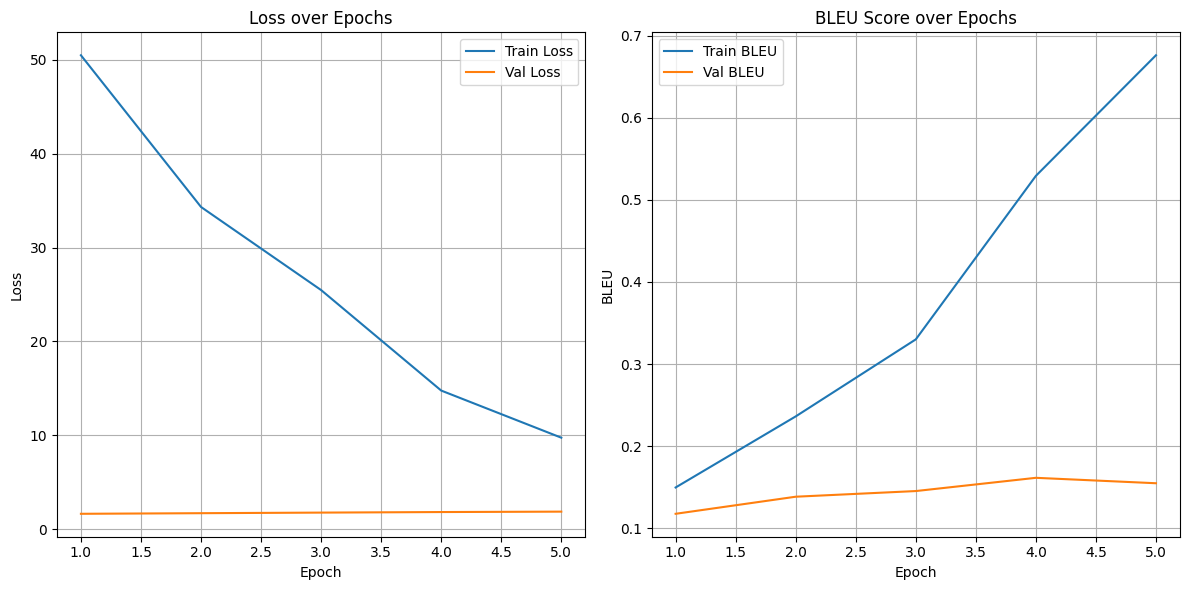

In [30]:
# Plot
epochs = range(1, len(history1['train_loss']) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history1['train_loss'], label='Train Loss')
plt.plot(epochs, history1['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history1['train_bleu'], label='Train BLEU')
plt.plot(epochs, history1['val_bleu'], label='Val BLEU')
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.title("BLEU Score over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
# # load state dict
# statedict_1 = torch.load('statedict_model1.pth')
# encoder_1.load_state_dict(statedict_1['encoder'])
# decoder_1.load_state_dict(statedict_1['decoder'])

## Model 2 (modified version):

In [32]:
generate_seed(SEED)
encoder_2 = Encoder(vocab_size_inp, embedding_dim, hidden_size, modified=True).to(device=device)
decoder_2 = Decoder(hidden_size, vocab_size_trg, embedding_dim).to(device=device)

In [33]:
# encoder_2.apply(init_weights)

In [34]:
# decoder_2.apply(init_weights)

In [35]:
print(f"The model has {count_parameters(encoder_2):,} trainable parameters")
print(f"The model has {count_parameters(decoder_2):,} trainable parameters")

The model has 16,909,824 trainable parameters
The model has 28,803,082 trainable parameters


In [ ]:
# optimizer_2 = torch.optim.Adam(
#     params=list(encoder_2.parameters()) + list(decoder_2.parameters()),
#     lr=1e-4,  # or 5e-5
#     weight_decay=1e-5  # optional: helps regularize
# )

# scheduler_2 = torch.optim.lr_scheduler.ReduceLROnPlateau(
#     optimizer_2, mode='min', factor=0.5, patience=2, verbose=True
# )

optimizer_2 = torch.optim.Adam(params=list(encoder_2.parameters()) + list(decoder_2.parameters()))
scheduler_2 = StepLR(optimizer_2, step_size=3, gamma=0.2)

criterion_2 = nn.CrossEntropyLoss()

In [37]:
best_state2, history2 = train(
    encoder_2, decoder_2,
    train_loader,
    val_loader,
    optimizer_2,
    criterion_2,
    train_trg.id2word,
    lr_scheduler=scheduler_2,
    num_epochs=5, # 5
    print_every=100,
    device=device,
    early_stop=False
)

torch.save(best_state2, 'statedict_model2.pth')


Epoch 1/5
Iter 0, Loss = 8.979118
Iter 100, Loss = 3.066466
Iter 200, Loss = 2.514227
Iter 300, Loss = 2.563433
Iter 400, Loss = 2.310668
Iter 500, Loss = 2.213751
Iter 600, Loss = 1.999572
Iter 700, Loss = 2.035497
Iter 800, Loss = 1.822657
Iter 900, Loss = 1.891052
Iter 1000, Loss = 1.805855
Iter 1100, Loss = 2.080153
Epoch 1 Summary:
Train Loss = 50.4769, BLEU = 0.1545
Val   Loss = 1.6028, BLEU = 0.1184

Epoch 2/5
Iter 0, Loss = 1.436288
Iter 100, Loss = 1.838848
Iter 200, Loss = 1.484672
Iter 300, Loss = 1.702225
Iter 400, Loss = 1.615105
Iter 500, Loss = 1.800622
Iter 600, Loss = 1.717361
Iter 700, Loss = 1.557719
Iter 800, Loss = 1.671765
Iter 900, Loss = 1.600165
Iter 1000, Loss = 1.512278
Iter 1100, Loss = 1.729021
Epoch 2 Summary:
Train Loss = 34.7360, BLEU = 0.2295
Val   Loss = 1.7109, BLEU = 0.1402

Epoch 3/5
Iter 0, Loss = 1.038688
Iter 100, Loss = 1.061533
Iter 200, Loss = 1.140926
Iter 300, Loss = 1.260626
Iter 400, Loss = 1.078333
Iter 500, Loss = 1.196447
Iter 600, Loss

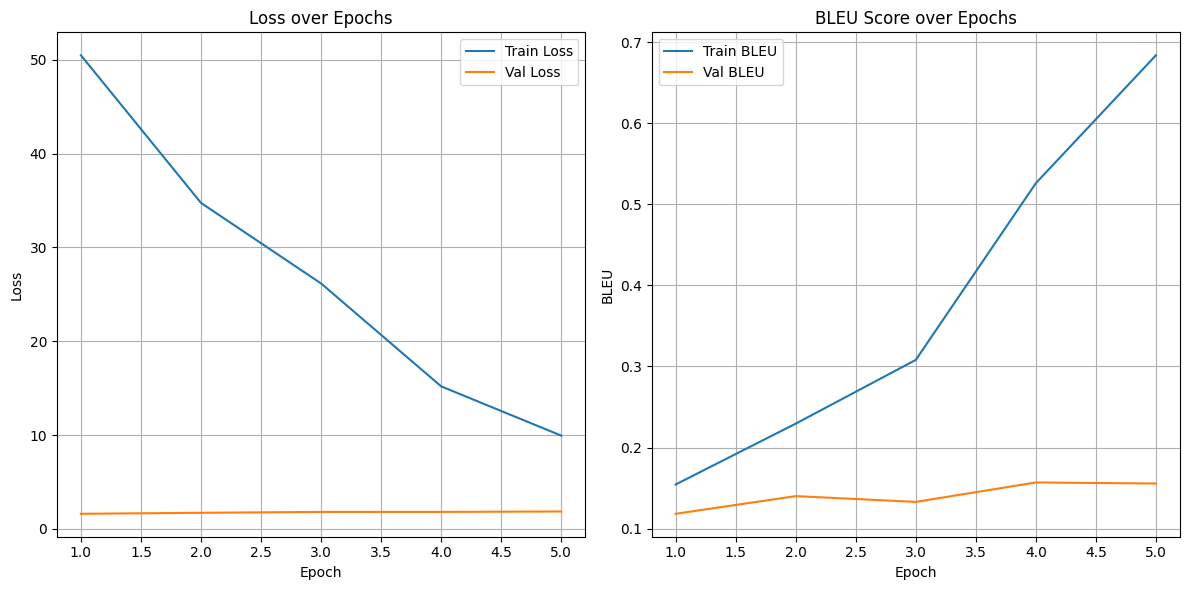

In [38]:
# Plot
epochs = range(1, len(history2['train_loss']) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, history2['train_loss'], label='Train Loss')
plt.plot(epochs, history2['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history2['train_bleu'], label='Train BLEU')
plt.plot(epochs, history2['val_bleu'], label='Val BLEU')
plt.xlabel("Epoch")
plt.ylabel("BLEU")
plt.title("BLEU Score over Epochs")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
# # load state dict
# statedict_2 = torch.load('statedict_model2.pth')
# encoder_2.load_state_dict(statedict_2['encoder'])
# decoder_2.load_state_dict(statedict_2['decoder'])

# Validate BLEU-4 score on test set

In [40]:
# Replace this with your actual shared link or file ID
# url1: https://drive.google.com/file/d/1eKgCzkANHMG1J7PDhhsWFBXfWCVPtJ_6/view?usp=sharing
# url2: https://drive.google.com/file/d/1Ai6QccoHGpxLhdgruxycqPyVRc1jnVLA/view?usp=sharing

# url1 = 'https://drive.google.com/uc?id=1eKgCzkANHMG1J7PDhhsWFBXfWCVPtJ_6'  # or full share link
# url2 = 'https://drive.google.com/uc?id=1Ai6QccoHGpxLhdgruxycqPyVRc1jnVLA'  # or full share link

# gdown.download(url1, quiet=False)
# gdown.download(url2, quiet=False)

In [41]:
# load state dict
statedict_1 = torch.load('statedict_model1.pth')
encoder_1.load_state_dict(statedict_1['encoder'])
decoder_1.load_state_dict(statedict_1['decoder'])

# load state dict
statedict_2 = torch.load('statedict_model2.pth')
encoder_2.load_state_dict(statedict_2['encoder'])
decoder_2.load_state_dict(statedict_2['decoder'])

<ipython-input-41-2d9e7c157a0c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  statedict_1 = torch.load('statedict_model1.pth')
<ipython-input-41-2d9e7c157a0c>:7: FutureWa

<All keys matched successfully>

In [42]:
test_model1 = validate(test_loader, encoder_1, decoder_1, test_trg.id2word, criterion_1, device)
test_model2 = validate(test_loader, encoder_2, decoder_2, test_trg.id2word, criterion_2, device)

In [43]:
print('Model 1 BLEU score: %.3f' %(100*test_model1[0]))
print('Model 2 BLEU score: %.3f' %(100*test_model2[0]))

Model 1 BLEU score: 18.376
Model 2 BLEU score: 18.788


# Test time


**1. Sentence 1**

Input: and i was very proud
Len: 5

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.02086247 0.06748296 0.18976565 0.40630424 0.1221453  0.12056131
 0.07287809]

🔍 Step 3 — Decoder Input: 87
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.04754392 0.03693548 0.14271905 0.30598357 0.24448985 0.17325982
 0.04906829]

🔍 Step 4 — Decoder Input: 84
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.04701779 0.02641111 0.11754151 0.29433662 0.26435545 0.19279003
 0.05754755]

🔍 Step 5 — Decoder Input: 73
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.01614433 0.0066336  0.01025482 0.09275609 0.1568679  0.6358842
 0.08145903]

🔍 Step 6 — Decoder Input: 177
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.04012686 0.00342381 0.00203634 0.00402562 0.11920848 0.39007565
 0.44110322]

🔍 Step 7 — Decoder Input: 982
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.169589   0.01686428 0.01653064 0.00677512 0.18225175 0.092

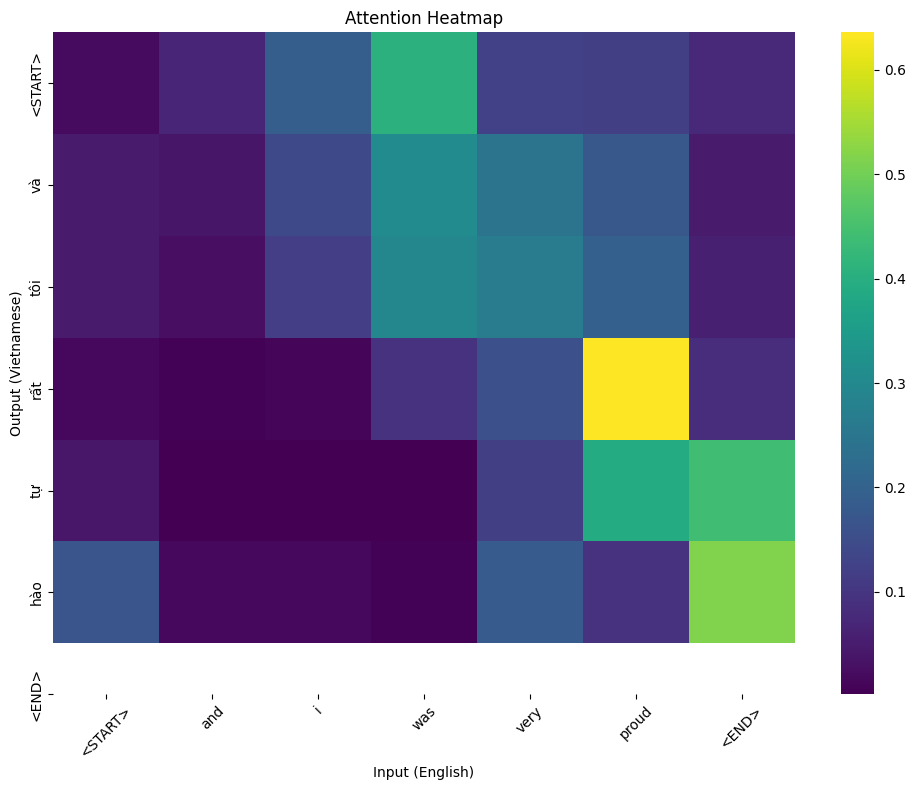

In [44]:
sentence = sentences_inp_test[0]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_1, decoder_1,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


Input: and i was very proud
Len: 5

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.12415244 0.3215071  0.29330057 0.13314228 0.0708112  0.04462566
 0.01246079]

🔍 Step 3 — Decoder Input: 87
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.24142991 0.11856084 0.24476878 0.20682602 0.11881845 0.06019968
 0.00939633]

🔍 Step 4 — Decoder Input: 84
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.05197123 0.01850043 0.10002805 0.53904223 0.17065528 0.10014698
 0.01965582]

🔍 Step 5 — Decoder Input: 73
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.03178065 0.00342399 0.0088039  0.03653287 0.15426187 0.72832334
 0.03687344]

🔍 Step 6 — Decoder Input: 177
Attention shape: torch.Size([1, 7, 1])
Raw attention: [2.7393924e-02 6.0152682e-04 6.5516052e-04 1.8519814e-03 3.3691566e-02
 7.7146697e-01 1.6433880e-01]

🔍 Step 7 — Decoder Input: 982
Attention shape: torch.Size([1, 7, 1])
Raw attention: [0.05614266 0.00222864 0.00231498 0.001

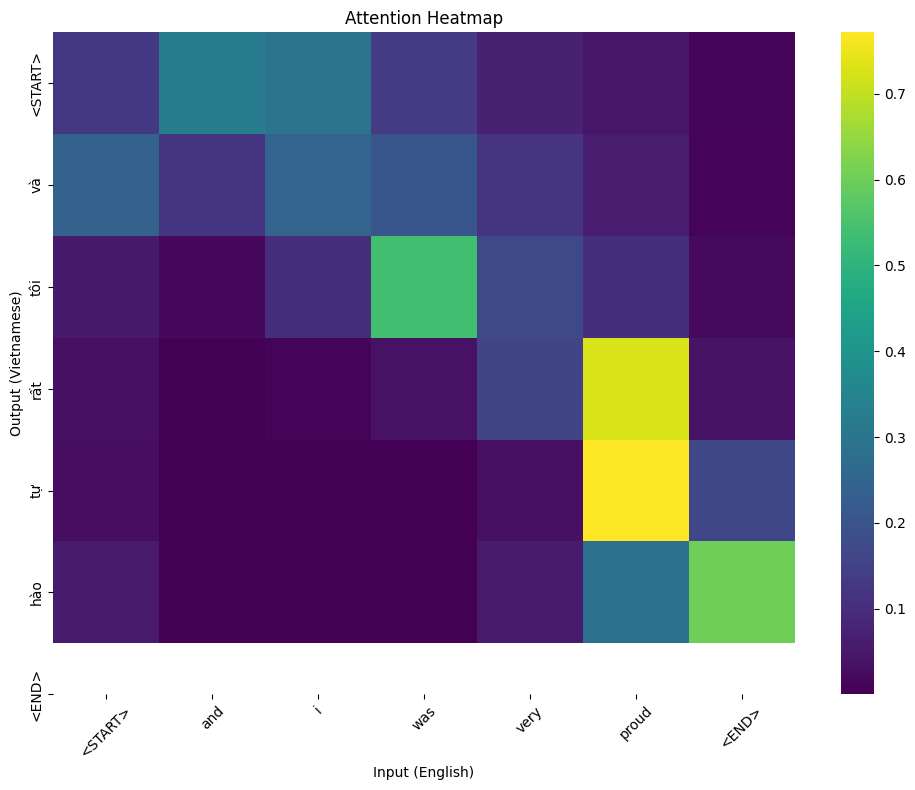

In [45]:
sentence = sentences_inp_test[0]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_2, decoder_2,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


**2. Sentence 2**

Input: but most people don apost agree
Len: 6

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 8, 1])
Raw attention: [1.1568562e-03 3.6499381e-01 6.0112202e-01 2.0505456e-02 5.9090238e-03
 4.6468209e-03 2.6321490e-04 1.4027795e-03]

🔍 Step 3 — Decoder Input: 273
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.01197025 0.08670474 0.8415626  0.045811   0.00437225 0.00150327
 0.00379875 0.00427705]

🔍 Step 4 — Decoder Input: 409
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.04368787 0.04573936 0.5331227  0.26775464 0.01879836 0.00315946
 0.0567879  0.03094969]

🔍 Step 5 — Decoder Input: 410
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.00453852 0.05331263 0.2258662  0.5594733  0.06049564 0.01859611
 0.0492347  0.02848293]

🔍 Step 6 — Decoder Input: 341
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.01360659 0.02604001 0.09943933 0.30849743 0.16596511 0.04243411
 0.29972884 0.04428858]

🔍 Step 7 — Decoder Input: 173
Attention shape: torc

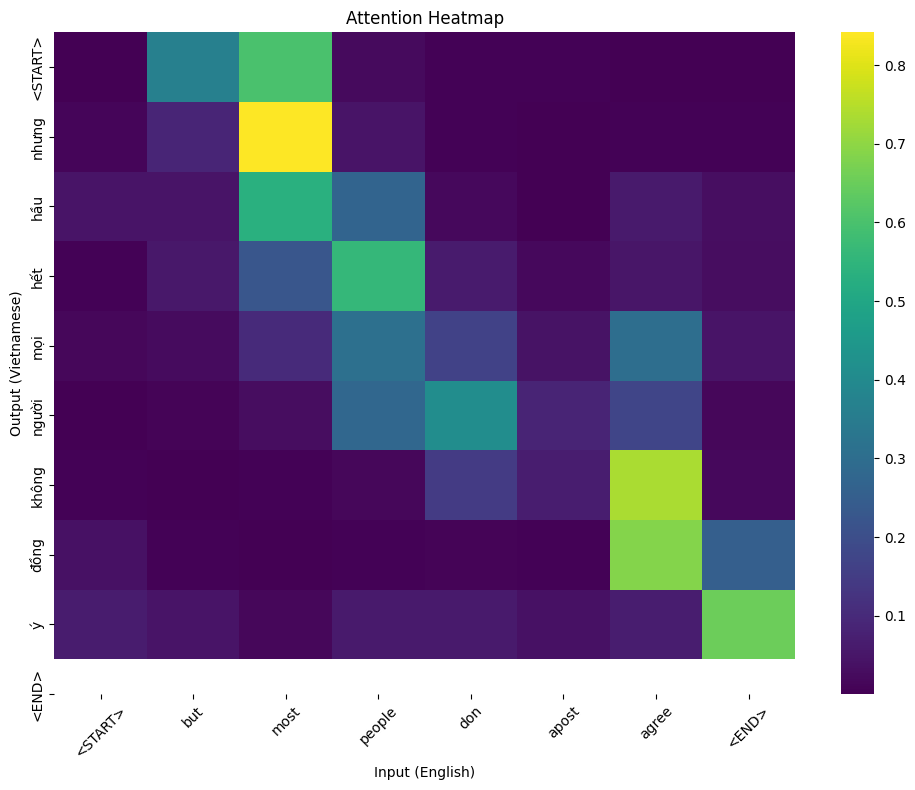

In [46]:
sentence = sentences_inp_test[50]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_1, decoder_1,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


Input: but most people don apost agree
Len: 6

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.18877646 0.45993957 0.21407032 0.06113474 0.02839691 0.02647941
 0.01300083 0.00820173]

🔍 Step 3 — Decoder Input: 273
Attention shape: torch.Size([1, 8, 1])
Raw attention: [1.9708907e-02 4.1289289e-02 9.1695762e-01 1.8718870e-02 1.5471873e-03
 7.8020064e-04 5.5818970e-04 4.3981610e-04]

🔍 Step 4 — Decoder Input: 409
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.03859956 0.04688532 0.64982086 0.2012172  0.04899202 0.00819411
 0.00496742 0.00132354]

🔍 Step 5 — Decoder Input: 410
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.07106375 0.02367077 0.4011028  0.37201238 0.10230897 0.0236812
 0.00495861 0.00120143]

🔍 Step 6 — Decoder Input: 341
Attention shape: torch.Size([1, 8, 1])
Raw attention: [0.03645584 0.00967304 0.23003963 0.3767003  0.25320822 0.05082986
 0.03910865 0.00398449]

🔍 Step 7 — Decoder Input: 173
Attention shape: torch

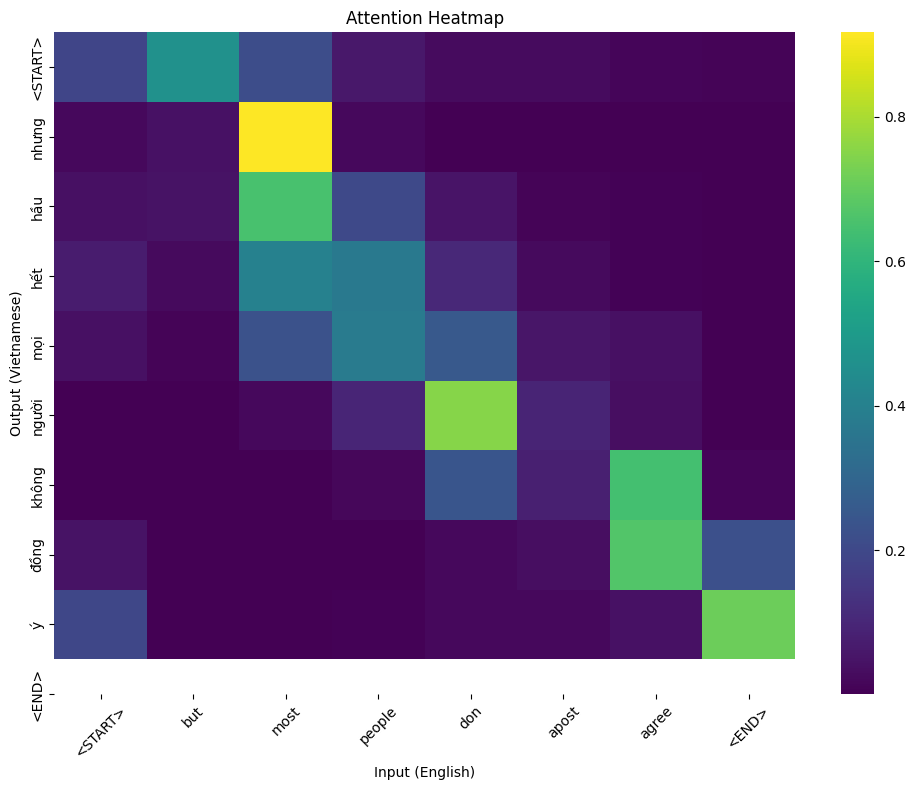

In [47]:
sentence = sentences_inp_test[50]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_2, decoder_2,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


In [48]:
# sentence = sentences_inp_test[50]
# print("Sentence: " + sentence)
# print("Model 1: " + translate(sentence, train_inp.word2id, train_trg.word2id, train_trg.id2word, encoder_1, decoder_1, MAX_LEN, device))
# print("Model 2: " + translate(sentence, train_inp.word2id, train_trg.word2id, train_trg.id2word, encoder_2, decoder_2, MAX_LEN, device))

**3. Sentence 3**

Input: i also didn apost know that the second step is to isolate the victim
Len: 14

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 16, 1])
Raw attention: [6.3577602e-03 6.7880785e-01 1.5396996e-01 4.7302205e-02 3.5466760e-02
 3.2875236e-02 6.8019908e-03 3.0216686e-03 1.0236280e-02 1.9114992e-02
 3.0878317e-03 8.4873271e-04 4.5845378e-04 2.2874092e-04 5.2011583e-04
 9.0149348e-04]

🔍 Step 3 — Decoder Input: 84
Attention shape: torch.Size([1, 16, 1])
Raw attention: [1.0067802e-02 5.3952597e-02 7.1141636e-01 1.3454752e-01 6.0956981e-02
 1.2199689e-02 3.1435548e-03 1.3637742e-03 2.5373735e-03 3.2877070e-03
 1.6475158e-03 1.4497931e-03 1.1724581e-03 1.8153801e-04 5.7385262e-04
 1.5013770e-03]

🔍 Step 4 — Decoder Input: 338
Attention shape: torch.Size([1, 16, 1])
Raw attention: [0.01096101 0.00454081 0.09969112 0.44629142 0.10866912 0.2460076
 0.04296142 0.01150628 0.00695728 0.01132817 0.00227545 0.00172012
 0.00266995 0.0006444  0.00094655 0.00282926]

🔍 Step 5 — Decoder Inpu

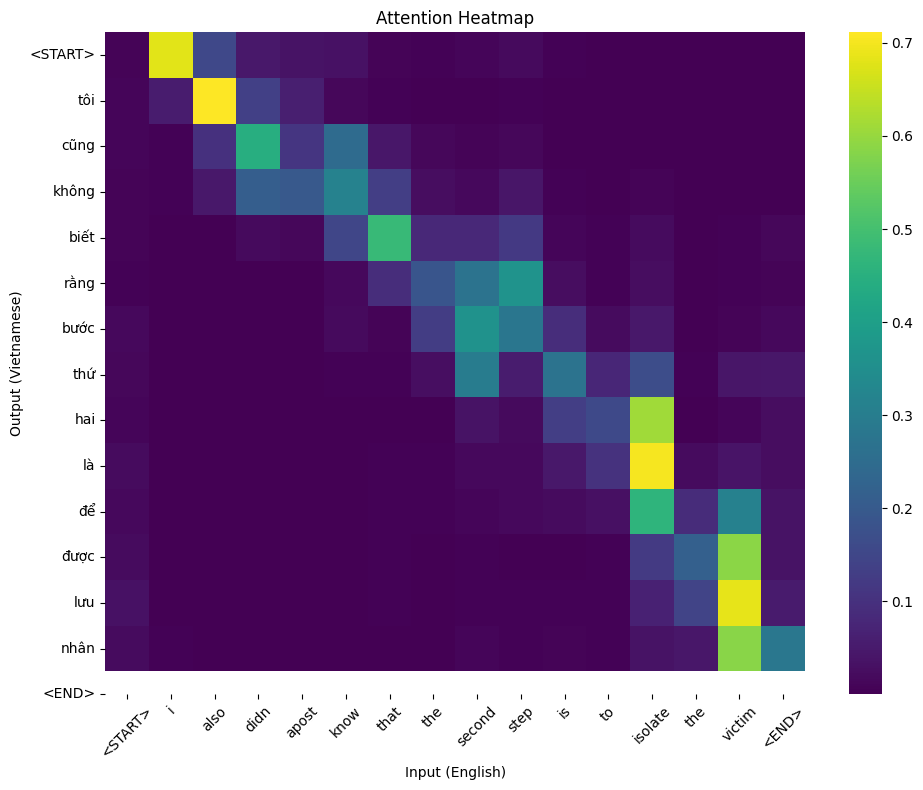

In [49]:
sentence = sentences_inp_test[100]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_1, decoder_1,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


Input: i also didn apost know that the second step is to isolate the victim
Len: 14

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 16, 1])
Raw attention: [0.17454907 0.2523686  0.20218949 0.08597191 0.0671526  0.04142426
 0.02286866 0.0150841  0.02282796 0.05513412 0.01142918 0.00816231
 0.01543492 0.00544236 0.00736499 0.01259543]

🔍 Step 3 — Decoder Input: 84
Attention shape: torch.Size([1, 16, 1])
Raw attention: [3.6984354e-02 2.7306467e-02 7.1023643e-01 1.5284306e-01 3.6961153e-02
 1.8479580e-02 2.2443945e-03 2.0285118e-03 5.3116735e-03 3.9058181e-03
 8.9598604e-04 5.0575100e-04 1.3262592e-03 1.5544472e-04 2.5860712e-04
 5.5653311e-04]

🔍 Step 4 — Decoder Input: 338
Attention shape: torch.Size([1, 16, 1])
Raw attention: [3.4074221e-02 4.3544844e-03 7.8295812e-02 6.4207679e-01 6.9548540e-02
 1.5812179e-01 6.7754439e-03 8.1737700e-04 1.8884403e-03 3.3883795e-03
 9.6847274e-05 4.9018632e-05 4.2670593e-04 6.3796497e-06 1.4946389e-05
 6.4850632e-05]

🔍 Step 5 — Decoder Inp

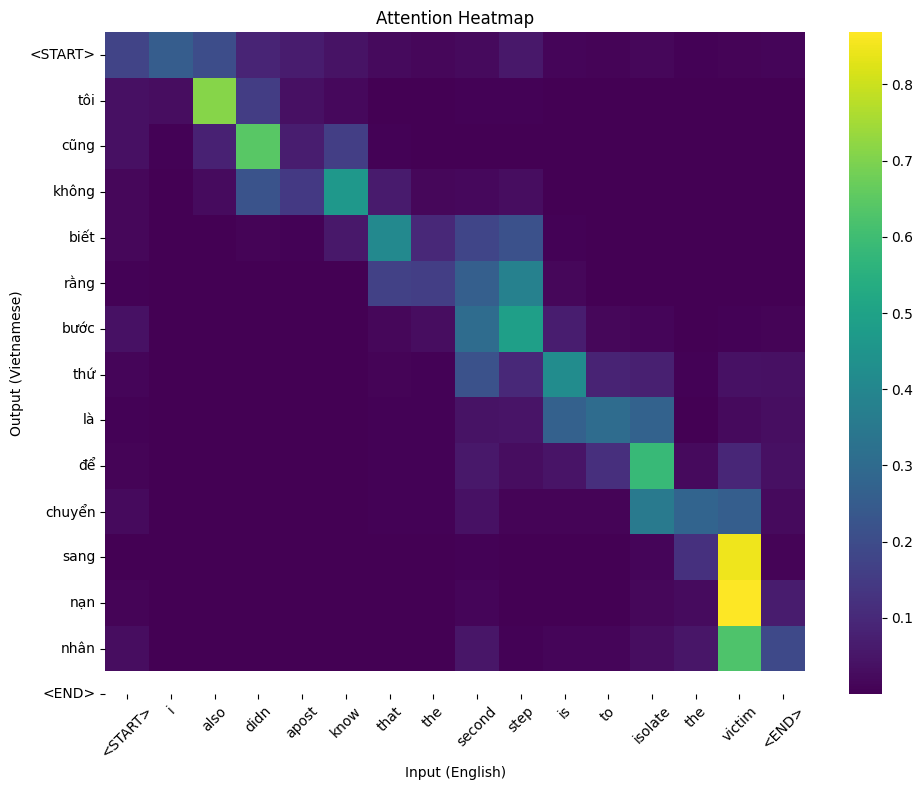

In [50]:
sentence = sentences_inp_test[100]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_2, decoder_2,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


**4. Sentence 4**

Input: my family was not poor  and myself  i had never experienced hunger
Len: 12

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 14, 1])
Raw attention: [1.7892860e-03 3.5811633e-02 9.5352679e-01 3.3242826e-03 7.8300026e-04
 4.8126024e-04 8.1644437e-05 3.1653531e-03 9.1036141e-05 8.6616965e-05
 1.0241952e-04 7.7011326e-05 5.4229965e-04 1.3746519e-04]

🔍 Step 3 — Decoder Input: 33
Attention shape: torch.Size([1, 14, 1])
Raw attention: [6.8605603e-03 6.5907583e-02 8.5429275e-01 3.3253312e-02 1.2167043e-02
 8.0439569e-03 1.6996452e-03 8.1333844e-03 1.4817545e-03 1.5729842e-03
 1.2086971e-03 7.9013489e-04 1.2114010e-03 3.3767519e-03]

🔍 Step 4 — Decoder Input: 639
Attention shape: torch.Size([1, 14, 1])
Raw attention: [5.4795337e-03 2.7847958e-01 2.0440289e-01 2.2517362e-01 2.0099302e-01
 6.2593557e-02 5.5791838e-03 4.4059744e-03 2.4800440e-03 2.5096468e-03
 3.8937582e-03 1.2834386e-03 2.5563288e-04 2.4701422e-03]

🔍 Step 5 — Decoder Input: 84
Attention shape: torch.Size([1, 1

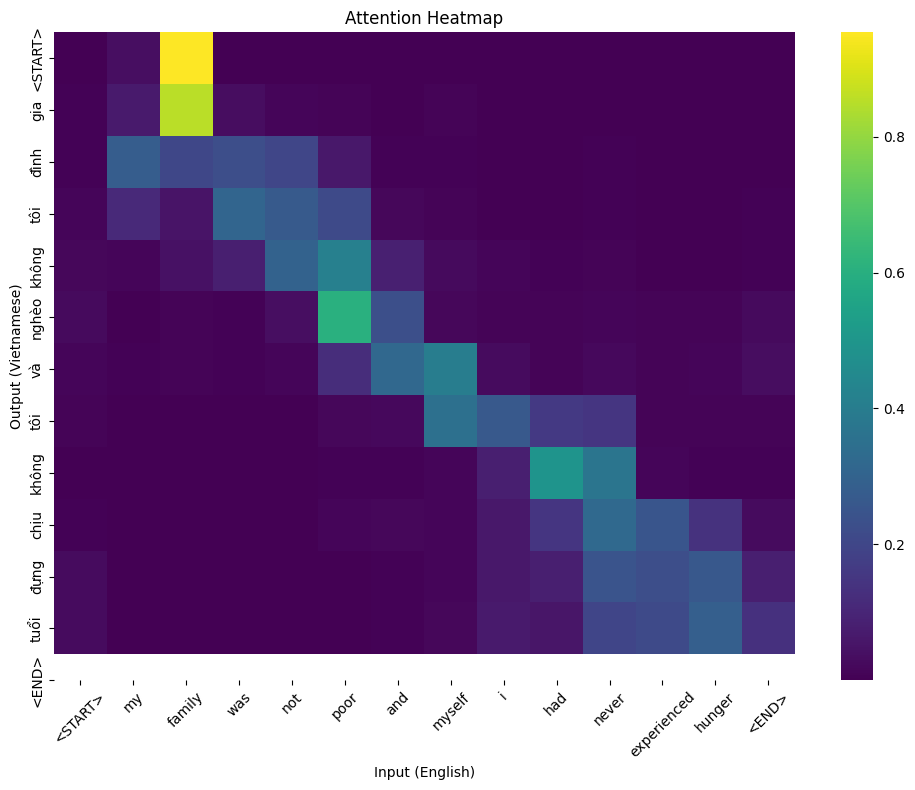

In [51]:
sentence = sentences_inp_test[1]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_1, decoder_1,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


Input: my family was not poor  and myself  i had never experienced hunger
Len: 12

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 14, 1])
Raw attention: [0.09000112 0.11134768 0.49698812 0.08483188 0.07464743 0.07575732
 0.02184513 0.02215104 0.00357321 0.00259664 0.00493516 0.00421963
 0.00376262 0.00334296]

🔍 Step 3 — Decoder Input: 33
Attention shape: torch.Size([1, 14, 1])
Raw attention: [1.0070534e-01 5.5161033e-02 6.0964400e-01 1.4584118e-01 3.8578663e-02
 4.1806675e-02 3.6863436e-03 3.7577455e-03 1.1412438e-04 9.8971017e-05
 2.7713517e-04 1.0070768e-04 6.3728381e-05 1.6432654e-04]

🔍 Step 4 — Decoder Input: 639
Attention shape: torch.Size([1, 14, 1])
Raw attention: [8.0981381e-02 1.7126340e-01 2.5514328e-01 3.2847199e-01 1.0748568e-01
 4.8943557e-02 5.3507844e-03 1.6505443e-03 2.2170578e-04 5.7324727e-05
 2.0522707e-04 6.6655819e-05 4.1966716e-05 1.1650297e-04]

🔍 Step 5 — Decoder Input: 84
Attention shape: torch.Size([1, 14, 1])
Raw attention: [3.4014434e-02 2.725

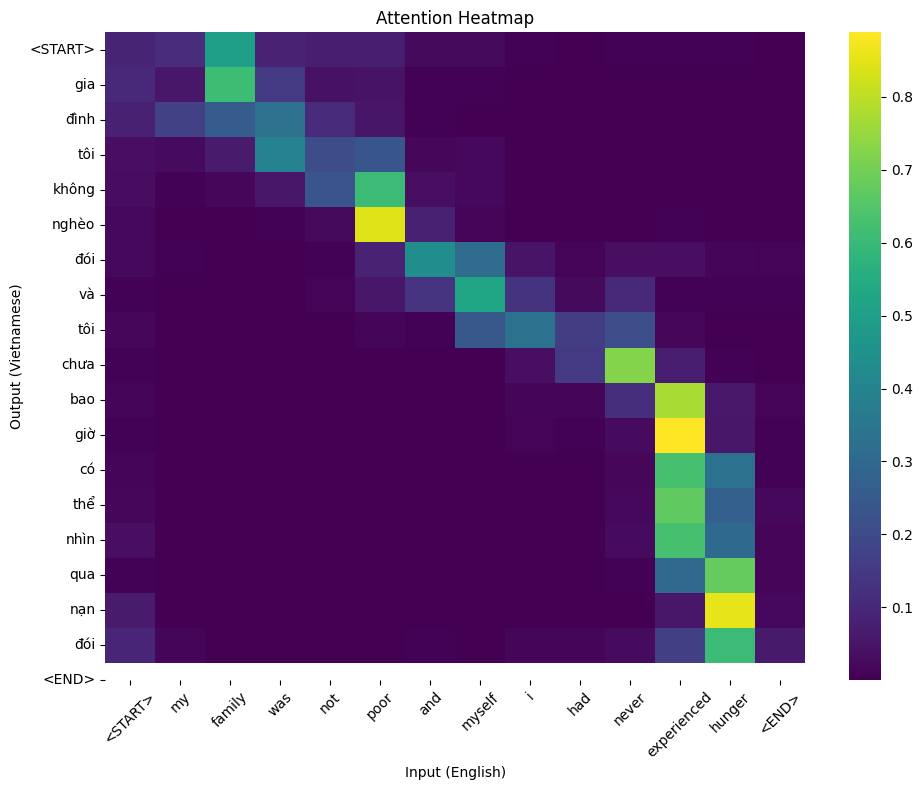

In [52]:
sentence = sentences_inp_test[1]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_2, decoder_2,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


**5. Sentence 5**

Input: this was the first time i heard that people in my country were suffering
Len: 14

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 16, 1])
Raw attention: [6.57907221e-03 5.95984519e-01 2.01827988e-01 1.39957760e-02
 4.14283127e-02 1.03491545e-01 8.98870174e-03 1.36794550e-02
 3.90339526e-03 1.61968532e-03 3.48958327e-03 5.91480988e-04
 1.10797933e-03 2.04904261e-03 6.11827651e-04 6.51639362e-04]

🔍 Step 3 — Decoder Input: 93
Attention shape: torch.Size([1, 16, 1])
Raw attention: [0.02463152 0.1038521  0.15494385 0.10947732 0.13167457 0.3112384
 0.03328048 0.09977115 0.00444779 0.00829529 0.00600708 0.00255087
 0.00411214 0.00225959 0.00198151 0.00147636]

🔍 Step 4 — Decoder Input: 16
Attention shape: torch.Size([1, 16, 1])
Raw attention: [0.00773837 0.04122712 0.0453912  0.11454304 0.06285726 0.5860195
 0.02630992 0.10469282 0.00256784 0.00270237 0.00231126 0.00061358
 0.00104644 0.00062102 0.000598   0.00076013]

🔍 Step 5 — Decoder Input: 405
Attention shape: torch.S

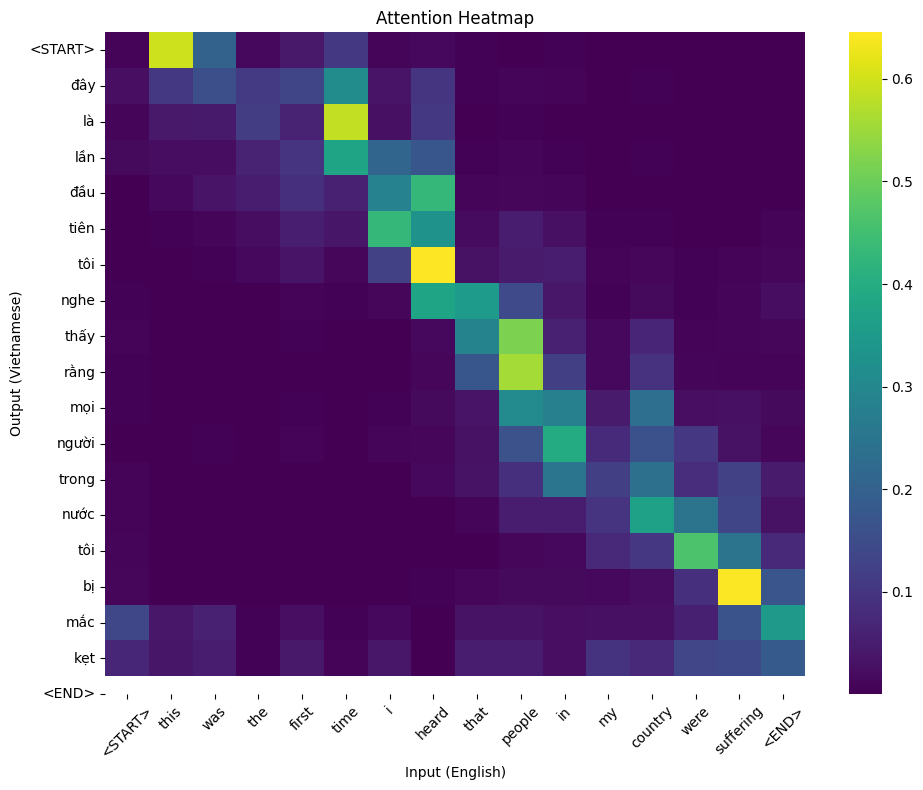

In [53]:
sentence = sentences_inp_test[3]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_1, decoder_1,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)


Input: this was the first time i heard that people in my country were suffering
Len: 14

🔍 Step 2 — Decoder Input: 0
Attention shape: torch.Size([1, 16, 1])
Raw attention: [0.13224453 0.36991546 0.15313564 0.04643681 0.04833945 0.10918132
 0.03908753 0.03985862 0.01115445 0.01664396 0.0091587  0.00501459
 0.00756526 0.00399791 0.00406495 0.00420084]

🔍 Step 3 — Decoder Input: 93
Attention shape: torch.Size([1, 16, 1])
Raw attention: [8.6614884e-02 8.1568219e-02 2.0815870e-01 8.3426625e-02 1.1281293e-01
 2.6865903e-01 7.6732136e-02 7.2661556e-02 2.0527083e-03 3.1370772e-03
 1.6626670e-03 3.2069458e-04 1.1263952e-03 1.8507388e-04 4.2085338e-04
 4.6047996e-04]

🔍 Step 4 — Decoder Input: 16
Attention shape: torch.Size([1, 16, 1])
Raw attention: [8.6279988e-02 3.7136104e-02 8.8234626e-02 1.5431114e-01 2.1261391e-01
 2.9713514e-01 6.1376277e-02 5.8116432e-02 1.3832505e-03 2.1642414e-03
 3.8261362e-04 5.2462594e-05 4.3540852e-04 5.5658136e-05 1.6949417e-04
 1.5323976e-04]

🔍 Step 5 — Decoder 

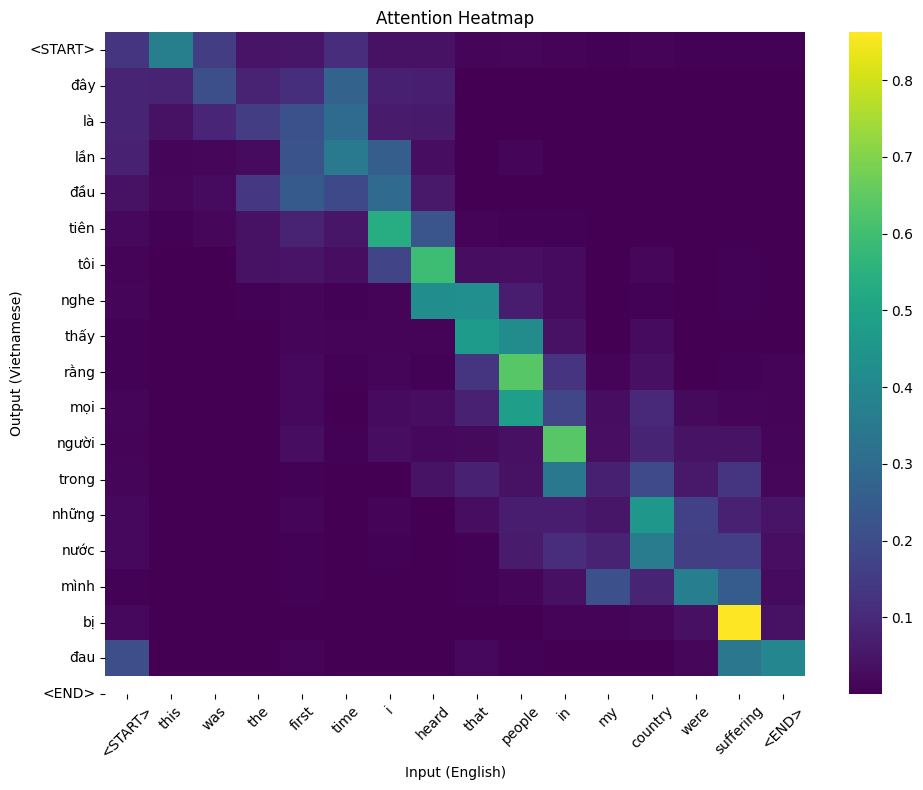

In [54]:
sentence = sentences_inp_test[3]
print("Input:", sentence)
print("Len:", len(sentence.split()))

translated_words, input_words, attn_matrix = translate(
    sentence,
    train_inp.word2id, train_trg.word2id, train_trg.id2word,
    encoder_2, decoder_2,
    trg_max_len=int(2*len(sentence.split())), # MAX_LEN
    device=device
)

print("Output:", ' '.join(translated_words))
print("Input:", input_words)
print("Translate:", translated_words)
plot_attention(attn_matrix, input_words, translated_words)
